In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sp
import numpy as np

In [7]:
a=0.1
b=0.3
gamma=0.5
beta=0.8
mu=0.3
r=20

In [8]:
def offspring_intensity(eta,t):
    return eta*np.exp(-beta*(t))

In [9]:
def next_arrival_time(eta,beta,r,t_current):
    p=sp.uniform.rvs(size=1)[0]
    def integral_equation(t_prev,t):
        return 1-np.exp(-(-eta*np.exp(-beta*t)/beta+eta*np.exp(-beta*t_prev)/beta))
    tau=0
    while integral_equation(t_current,t_current+tau)<p:
        tau+=0.01
        if tau>r:
            return r
    return tau
    

def next_event(mu,history_ongoing,history_finished,E_ongoing,E_finished,r):
    N=len(history_ongoing)
    if N==0:
        return history_finished,E_finished
    removal_history=[]
    removal_E=[]
    for n in range(N):
        if history_ongoing[n][0]==0:
            p=sp.uniform.rvs(size=1)[0]
            integral_equation = lambda t: 1-np.exp(-mu*t)
            tau=0
            while integral_equation(tau)<p:
                tau+=0.01
                if tau>r:
                    tau=r
                    break
            time=tau
        else:
            time=next_arrival_time(E_ongoing[n],0.8,r,history_ongoing[n][-1])
        if history_ongoing[n][-1]+time<r:
            history_ongoing[n].append(history_ongoing[n][-1]+time)
            history_ongoing.append([history_ongoing[n][-2]+time])
            E_ongoing.append(sp.uniform.rvs(size=1)[0]+0.5)
        else:
            history_finished.append(history_ongoing[n])
            E_finished.append(E_ongoing[n])
            removal_history.append(history_ongoing[n])
            removal_E.append(E_ongoing[n])
    for timeline in removal_history:
        history_ongoing.remove(timeline)
    for e in removal_E:
        E_ongoing.remove(e)
    return next_event(mu,history_ongoing,history_finished,E_ongoing,E_finished,r)

In [10]:
def CIF(timelines,E,t,mu,beta):
    intensity=0
    for i in range(len(timelines)):
        time=timelines[i][0]
        if E[i]==mu:
            intensity+=mu
        elif t>time:
            intensity+=E[i]*np.exp(-beta*(t-time))
    return intensity

Text(0, 0.5, 'Intensity')

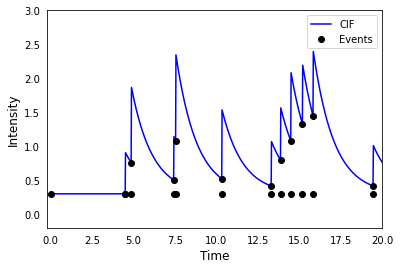

In [12]:
histories=next_event(mu,[[0]],[],[mu],[],r)

x=np.linspace(0,r,1000)

plt.axis([-0.2,r,-0.2,3])
plt.plot(x,[CIF(histories[0],histories[1],t,mu,0.8) for t in x],label='CIF',color='blue')


for n in range(len(histories[0])):
    if n==0:
        plt.plot(histories[0][n],np.ones(len(histories[0][n]))*CIF(histories[0],histories[1],histories[0][n][0],mu,0.8),'o',color='black',label='Events')
    else:
        plt.plot(histories[0][n],np.ones(len(histories[0][n]))*CIF(histories[0],histories[1],histories[0][n][0],mu,0.8),'o',color='black')

        
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
plt.legend(fontsize=10)
plt.xlabel('Time',fontsize=12)
plt.ylabel('Intensity',fontsize=12)
#plt.savefig('hawkes_realisation.pdf')